In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from  tensorflow import keras 
sys.path.append("..") # Adds higher directory to python modules path.
import brevis
from brevis import branches
from brevis import evaluate

In [3]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,15000,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [4]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = brevis.BranchModel(name="../models/alexNetv6_logits.hdf5", custom_objects={})
           
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()


preset: Other


In [5]:

# model.evaluate(test_ds)

In [6]:
model.fit(train_ds,validation_ds, epochs=1)

Setting Main Layers  and branch layers training to true
 574/1407 [===========>..................] - ETA: 1:10 - loss: 0.1738 - accuracy: 0.9390

KeyboardInterrupt: 

In [6]:
# train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)
# plain_model = tf.keras.models.load_model('../models/alexNetv6_logits.hdf5')
# plain_model.evaluate(test_ds)


augment Dataset
targetsis : False
trainSize 45000
testSize 10000
312/312 [==============================] - 4s 11ms/step - loss: 0.6905 - accuracy: 0.7940


[0.6905280947685242, 0.7939703464508057]

In [35]:
model.evaluate(test_ds)

312/312 [==============================] - 14s 44ms/step - loss: 3.9344 - dense_2_loss: 0.7408 - branch_softmax_loss: 1.3293 - branch_softmax_1_loss: 0.9523 - branch_softmax_2_loss: 0.9120 - dense_2_accuracy: 0.8082 - branch_softmax_accuracy: 0.5725 - branch_softmax_1_accuracy: 0.6944 - branch_softmax_2_accuracy: 0.8040


[3.934393882751465,
 0.7407968044281006,
 1.3293029069900513,
 0.9523210525512695,
 0.9119740724563599,
 0.8081930875778198,
 0.5725160241127014,
 0.694411039352417,
 0.8039863705635071]

Entropy
----
<hr>


In [13]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [14]:
import random
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = tf.keras.models.load_model('../models/alexNetv6_entropy.hdf5')
model.summary()
# model.evaluate(test_ds)
# model.add_targets(10)
# model.add_branches(branches.branch.newBranch_flatten_evidence,
#                           ["max_pooling2d",
#                             "max_pooling2d_1",
#                             "dense"
#                           ],
#                           target_input=True,loop=False,num_outputs=10)
            
# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

Model: "model_branched"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 55, 55, 96)   34944       ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 96)  384         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                     

In [31]:
# SVM reliability diagram with calibration
def classification(y, prob, bins =10):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    linspace = np.linspace(0,1,num=bins)
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()

import math
    
# SVM reliability diagram with calibration
def cumulativeClassification(y, prob, bins =10, thresholdType = ">="):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    print("max",max(prob))
    linspace = np.linspace(0,math.ceil(max(prob)),num=bins)
    # pyplot.hist(prob,bins=linspace,density=False)
    accuracy = []
    throughputs = []
    for point in linspace:
        true = 0
        false = 0   
        throughput = 0
        for i, p in enumerate(prob):
            
            if threshold == ">=":
                if p >= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
            else:
                if p <= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
        try:
            accuracy.append(true/(true+false))
            throughputs.append(throughput/len(prob))
            # print(point, throughput/len(prob))                
        except:
            accuracy.append(0)
            throughputs.append(0)
            pass
    # print(throughputs)
    pyplot.plot(linspace[:len(throughputs)], throughputs,label="Accepted (y) for threshold (x)")
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot calibrated reliability
    # pyplot.plot(mpv, fop, marker='.',label="calibration")
    # fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    # pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(linspace[:len(accuracy)], accuracy, marker='.',color='blue',label="Accuracy")
    pyplot.legend(loc="upper right")
    pyplot.legend(bbox_to_anchor=(1.1, 1.05))
    pyplot.xlabel('Probability/Evidence')
    # pyplot.set_ylabel('Rating')
    pyplot.show()
    

In [16]:
def calcEntropy_Tensors2(y_hat):
    #entropy is the sum of y * log(y) for all possible labels.
    #doesn't deal with cases of log(0)
    val = y_hat * (tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype)))
    # print(val)
    # print(tf.boolean_mask(val,tf.math.is_finite(val)))
    sumEntropies =  tf.reduce_sum(tf.boolean_mask(val,tf.math.is_finite(val)))
    
    return -sumEntropies


def getPredictions(model):
    stopping_point = None
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    print("outputs",num_outputs)
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    Outputs = pd.DataFrame()
    pAcc=[]
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
    for i, (x,y) in enumerate(test_ds):
        if stopping_point and i > stopping_point:
            break
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        predictions = model.predict(x)
        for k, outputs in enumerate(predictions[0]):
            # print("output ", k, outputs)
            for j, prediction in enumerate(outputs):
                # print(prediction)
                # for pred
                Results[k].append(np.argmax(prediction))
                # Pred[k].append((np.amax(tf.nn.softplus(prediction))))
                # print(brevis.utils.calcEntropy_Tensors((prediction)).numpy())
                Pred[k].append(calcEntropy_Tensors2((prediction)).numpy())
                
                Labels[k].append(np.argmax(y[j]))
    Outputs=[]
    for j in range(num_outputs):
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],"probs":Pred[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        #create new column in DataFrame that displays results of comparisons
        df['testy'] = np.select(conditions, choices, default=None)

        Outputs.append(df)
    return Outputs

In [17]:
outputs = getPredictions(model)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
dense_2/Softmax:0f 312


,x,y,probs,testy
0,5,3,0.967451,0
1,1,8,0.688867,0
2,1,8,1.066203,0
3,0,0,0.038588,1
4,6,6,0.984731,1
...,...,...,...,...
9979,3,3,0.637200,1
9980,0,0,0.022827,1
9981,4,4,0.636712,1
9982,6,2,0.048830,0


branch_softmax/Softmax:0


,x,y,probs,testy
0,3,3,2.731129,1
1,8,8,1.180682,1
2,0,8,1.453365,0
3,0,0,1.833409,1
4,4,6,0.408693,0
...,...,...,...,...
9979,6,3,2.208449,0
9980,0,0,0.000374,1
9981,7,4,0.000004,0
9982,6,2,0.701822,0


branch_softmax_1/Softmax:0


,x,y,probs,testy
0,3,3,2.748128,1
1,8,8,0.304155,1
2,1,8,2.119194,0
3,0,0,0.049535,1
4,4,6,0.984246,0
...,...,...,...,...
9979,3,3,0.034134,1
9980,0,0,0.194536,1
9981,7,4,0.004547,0
9982,6,2,1.120108,0


branch_softmax_2/Softmax:0


,x,y,probs,testy
0,3,3,1.562917e-01,1
1,1,8,9.744214e-01,0
2,8,8,3.854207e-04,1
3,0,0,2.733592e-07,1
4,6,6,2.120153e-01,1
...,...,...,...,...
9979,3,3,1.031115e-03,1
9980,0,0,5.994688e-09,1
9981,4,4,4.239391e-04,1
9982,6,2,9.827432e-15,0


threshold 1.9044235
max 3.2626593112945557


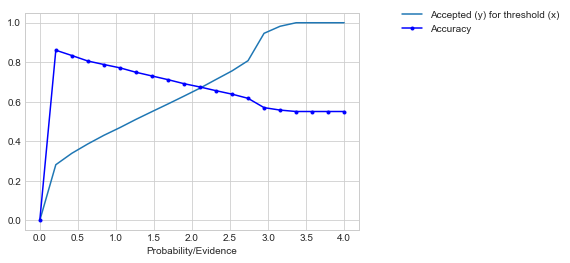

-----------------
rollover enabled, 3676 predictions provided
threshold 1.88457
max 3.214191436767578


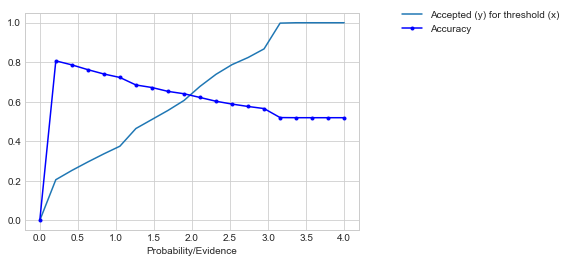

-----------------
rollover enabled, 1455 predictions provided
threshold 0.33500785
max 2.06901216506958


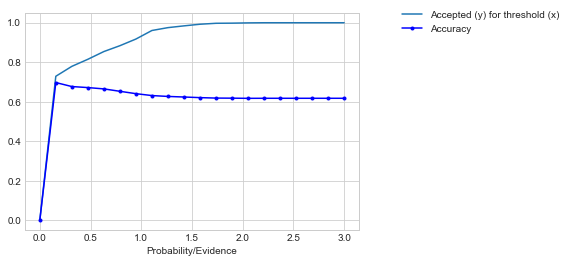

-----------------
rollover enabled, 314 predictions provided
threshold 0
max 3.0251553058624268


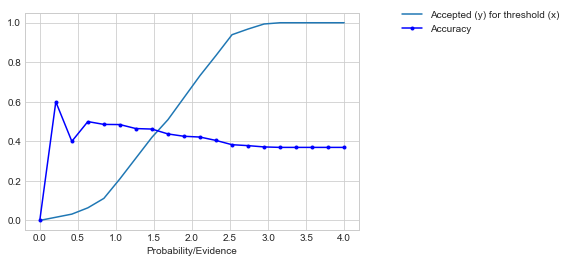

-----------------
thresholds [1.9044235, 1.88457, 0.33500785, 0]
input_predictions [9984, 3676, 1455, 314]
Accepted_list [6308, 2221, 1141, 0]
Acceptance_correct [4358, 1423, 771, 0]
overall Accuracy 0.677559462254395
branch_cost [3042827808, 3370685103, 91388902745, 0]
base cost:  97802415656  total cost: 1089797763460
cost difference:  0.08974363770529957


In [33]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
# Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    threshold = mean
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = 0
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] <= threshold)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] > threshold)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [ ]:
1015303831542
120020480229  



In [ ]:
print(298846962401/